In [1]:
from __future__ import division, absolute_import

import tflearn
from tflearn.data_utils import to_categorical, pad_sequences, VocabularyProcessor

from sklearn.cross_validation import train_test_split
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Exploratory analysis of dataset

In [7]:
games=pd.read_csv('ign.csv')

In [8]:
games.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [9]:
games.drop(['Unnamed: 0','url'],axis=1,inplace=True) #dropping the "unnamed" values
#games.drop(games.index[516],inplace=True) #dropping the game released on 1970. It looked to be an outlier

In [10]:
games.isnull().sum()

score_phrase       0
title              0
platform           0
score              0
genre             36
editors_choice     0
release_year       0
release_month      0
release_day        0
dtype: int64

Genre is the column that has 'null' values

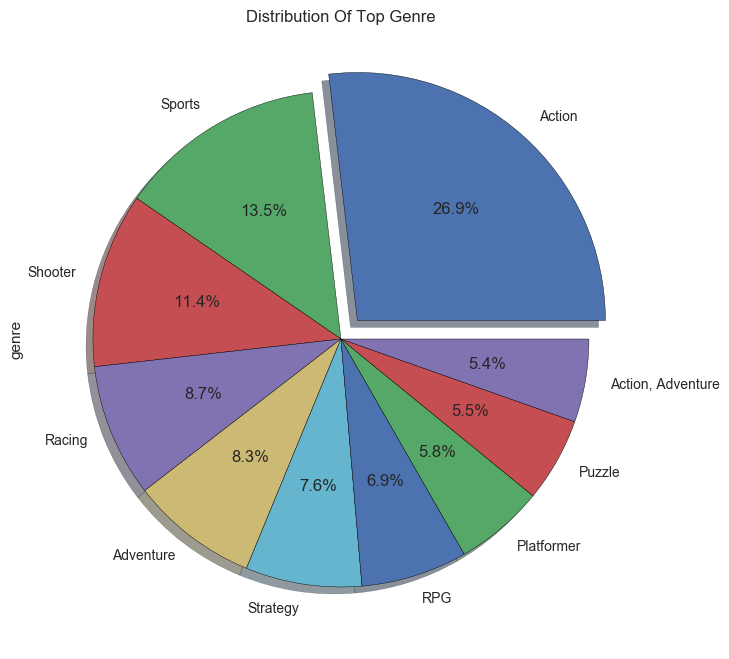

In [11]:
games['genre'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.title('Distribution Of Top Genre')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

### Distribution of score of games

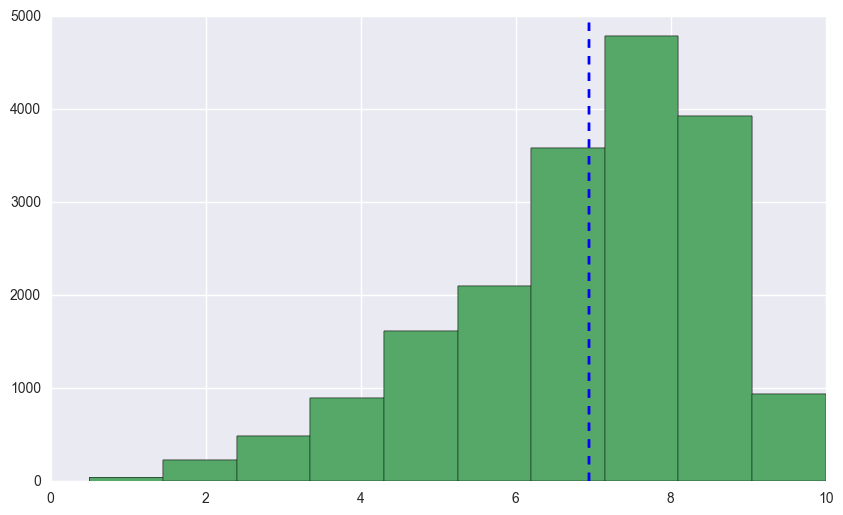

In [13]:
games['score'].hist(edgecolor='black')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axvline(games['score'].mean(),color='b',linestyle='dashed')
plt.show()

Mean score is 6.8-6.9
Majority of scores lie in the range of 6 to 8.


### Top platforms for gaming

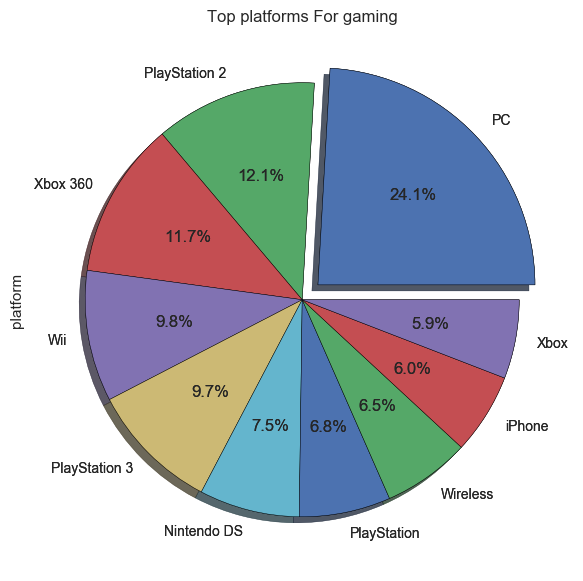

In [15]:
games['platform'].value_counts()[:10].plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.title('Top platforms For gaming')
plt.show()

In [19]:
games16=games.copy()
games16=games16[games16['release_year']==2016]
genres_2016=games16['genre'].value_counts()[:15]

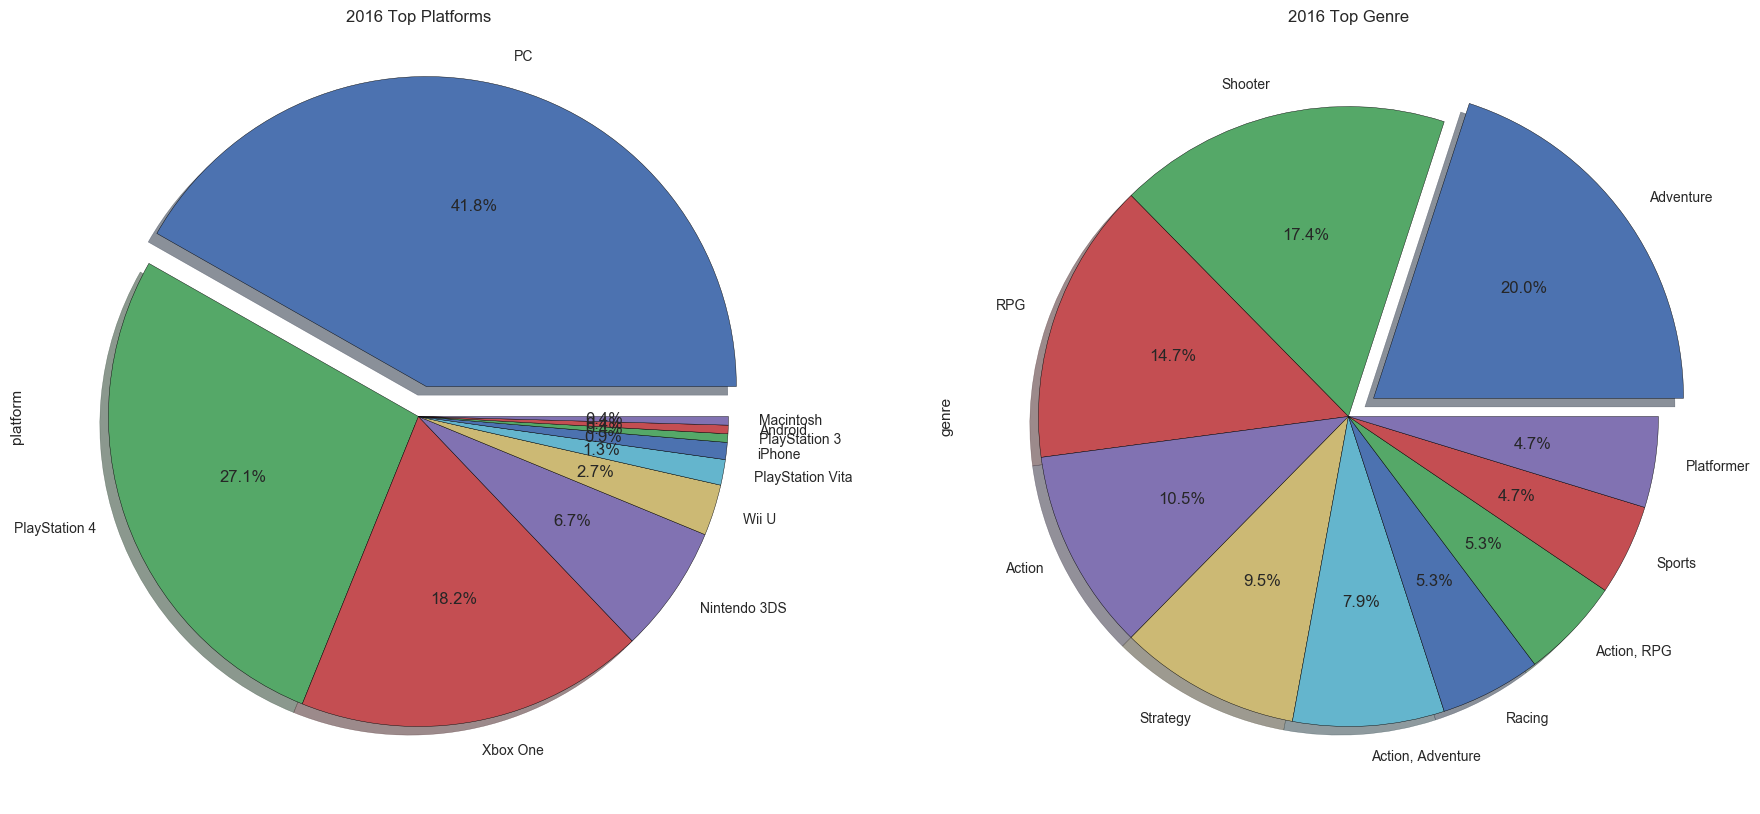

In [24]:
f, ax = plt.subplots(1,2,figsize=(22,10))
games16['platform'].value_counts()[:10].plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
ax[0].set_title('2016 Top Platforms')
fig = plt.gcf()
games16['genre'].value_counts()[:10].plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
ax[1].set_title('2016 Top Genre')
plt.show()

In [32]:
masterpiece=games[games['score_phrase']=='Masterpiece']
print('The total number of masterpieces produced till date are:',masterpiece.shape[0])
print(masterpiece)

The total number of masterpieces produced till date are: 55
      score_phrase                                              title  \
1058   Masterpiece               The Legend of Zelda: Ocarina of Time   
1287   Masterpiece                               Pokemon Blue Version   
1289   Masterpiece                                Pokemon Red Version   
1354   Masterpiece                                              Joust   
1363   Masterpiece                                           Shanghai   
1408   Masterpiece                                     Checkered Flag   
1434   Masterpiece                           Super Mario Bros. Deluxe   
1457   Masterpiece                                        Soulcalibur   
1461   Masterpiece           The Legend of Zelda: Link's Awakening DX   
1592   Masterpiece                        Mario Golf [Game Boy Color]   
1672   Masterpiece            Pokemon Yellow: Special Pikachu Edition   
1794   Masterpiece               Sonic The Hedgehog: Pocket Adve

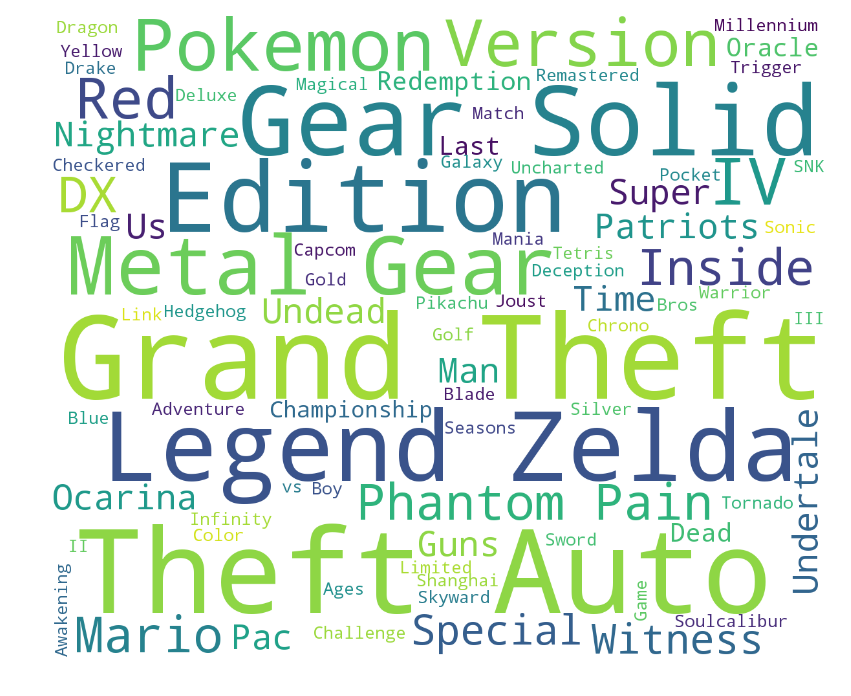

In [34]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,
                          height=1000).generate(" ".join(masterpiece['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### Sentimental analysis

In [2]:
dataframe = pd.read_csv('ign.csv').ix[:, 1:3]
# Fill null values with empty strings
dataframe.fillna(value='', inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [3]:
dataframe

,score_phrase,title
0,Amazing,LittleBigPlanet PS Vita
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...
2,Great,Splice: Tree of Life
3,Great,NHL 13
4,Great,NHL 13
5,Good,Total War Battles: Shogun
6,Awful,Double Dragon: Neon
7,Amazing,Guild Wars 2
8,Awful,Double Dragon: Neon
9,Good,Total War Battles: Shogun


In [5]:
titleCol=dataframe['title']
scoreCol=dataframe['score_phrase']

### Transform title column into list of indices using VocabularyProcessor

In [12]:
vocab_proc = VocabularyProcessor(15)
totalX = np.array(list(vocab_proc.fit_transform(titleCol)))

In [9]:
titleColVocab

array([[   1,    2,    3, ...,    0,    0,    0],
       [   1,    2,    3, ...,    0,    0,    0],
       [  11,   12,   13, ...,    0,    0,    0],
       ..., 
       [ 362, 1588, 8256, ...,    0,    0,    0],
       [1841,    0,    0, ...,    0,    0,    0],
       [1841,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [11]:
vocab_proc2 = VocabularyProcessor(1)
totalY = np.array(list(vocab_proc2.fit_transform(scoreCol))) - 1
# Convert the indices into 11 dimensional vectors
totalY = to_categorical(totalY, nb_classes=11)

In [13]:
# Split into training and testing data
trainX, testX, trainY, testY = train_test_split(totalX, totalY, test_size=0.1)

# Build the network for classification
# Each input has length of 15
net = tflearn.input_data([None, 15])
# The 15 input word integers are then casted out into 256 dimensions each creating a word embedding.
# We assume the dictionary has 10000 words maximum
net = tflearn.embedding(net, input_dim=10000, output_dim=256)
# Each input would have a size of 15x256 and each of these 256 sized vectors are fed into the LSTM layer one at a time.
# All the intermediate outputs are collected and then passed on to the second LSTM layer.
net = tflearn.gru(net, 256, dropout=0.9, return_seq=True)
# Using the intermediate outputs, we pass them to another LSTM layer and collect the final output only this time
net = tflearn.gru(net, 256, dropout=0.9)
# The output is then sent to a fully connected layer that would give us our final 11 classes
net = tflearn.fully_connected(net, 11, activation='softmax')
# We use the adam optimizer instead of standard SGD since it converges much faster
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,loss='categorical_crossentropy')

In [ ]:
model = tflearn.DNN(net, tensorboard_verbose=0)
load_model = 0
save_model = 0
if load_model == 1:
    model.load('gamemodel.tfl')

model.fit(trainX, trainY, validation_set=(testX, testY), show_metric=True, batch_size=32, n_epoch=20)

if save_model == 1:
    model.save('gamemodel.tfl')
    print ("Saved model!")

Training Step: 1499  | time: 99.006s
| Adam | epoch: 003 | loss: 0.00000 - acc: 0.0854 -- iter: 14432/16762
